In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
%matplotlib inline
from torch.autograd import Variable

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
import pandas as pd


In [2]:
#housing = pd.read_csv('housing.csv')
# dataset taken from https://www.kaggle.com/camnugent/california-housing-prices#x_train, x_test, y_train, y_test = train_test_split(housing.median_income, housing.median_house_value, test_size = 0.2)
#x_train.shape

In [3]:
# create dummy data
x_values = [i for i in range(20)]
x = np.array(x_values, dtype=np.float32)
x = x.reshape(-1, 1)

y_values = [2*i + 1 +  5*np.random.normal() for i in x_values] # small noise added
y = np.array(y_values, dtype=np.float32)
y = y.reshape(-1, 1)
y.shape

(20, 1)

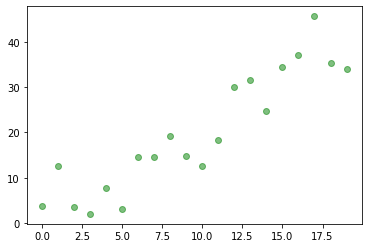

In [4]:
plt.plot(x, y, 'go', label='True data', alpha=0.5)

In [5]:
# simple linear regression model
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out

In [6]:
inputDim = 1        
outputDim = 1      
learningRate = 0.005
epochs = 200

model = linearRegression(inputDim, outputDim)

if torch.cuda.is_available():
    model.cuda()

In [7]:
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [8]:
for epoch in range(epochs):
    # Converting inputs and labels to Variable
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(x).cuda())
        labels = Variable(torch.from_numpy(y).cuda())
    else:
        inputs = Variable(torch.from_numpy(x))
        labels = Variable(torch.from_numpy(y))

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)
    #print(loss)
    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 0, loss 651.3448486328125
epoch 1, loss 64.05729675292969
epoch 2, loss 29.57004165649414
epoch 3, loss 27.54364585876465
epoch 4, loss 27.423376083374023
epoch 5, loss 27.4150333404541
epoch 6, loss 27.413284301757812
epoch 7, loss 27.411916732788086
epoch 8, loss 27.410593032836914
epoch 9, loss 27.409265518188477
epoch 10, loss 27.407949447631836
epoch 11, loss 27.406635284423828
epoch 12, loss 27.40533447265625
epoch 13, loss 27.404041290283203
epoch 14, loss 27.402751922607422
epoch 15, loss 27.40146827697754
epoch 16, loss 27.400196075439453
epoch 17, loss 27.39892578125
epoch 18, loss 27.39766502380371
epoch 19, loss 27.396413803100586
epoch 20, loss 27.395160675048828
epoch 21, loss 27.3939208984375
epoch 22, loss 27.3926944732666
epoch 23, loss 27.39145851135254
epoch 24, loss 27.390239715576172
epoch 25, loss 27.389022827148438
epoch 26, loss 27.3878173828125
epoch 27, loss 27.386615753173828
epoch 28, loss 27.38541603088379
epoch 29, loss 27.384227752685547
epoch 30, l

In [9]:
with torch.no_grad(): # we don't need gradients in the testing phase
    if torch.cuda.is_available():
        predicted = model(Variable(torch.from_numpy(x).cuda())).cpu().data.numpy()
    else:
        predicted = model(Variable(torch.from_numpy(x))).data.numpy()

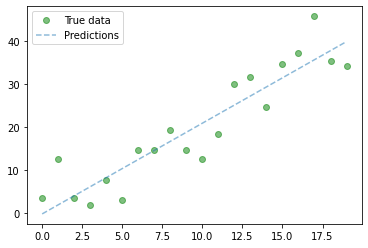

In [10]:
plt.clf()
plt.plot(x, y, 'go', label='True data', alpha=0.5)
plt.plot(x, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()

In [11]:
for name, param in model.named_parameters():
    if param.requires_grad:
        print (name, param.data)

linear.weight tensor([[2.1015]])
linear.bias tensor([-0.1103])


In [14]:
# let's delete point at index 2
x_r = np.delete(x, [i for i in range(10, 15)])
y_r = np.delete(y, [i for i in range(10, 15)])
x_r = x_r.reshape(-1, 1)
y_r = y_r.reshape(-1, 1)

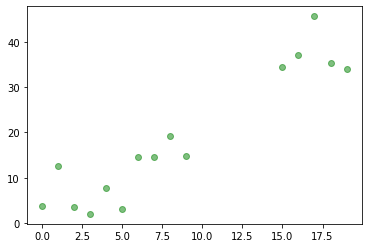

In [15]:
plt.plot(x_r, y_r, 'go', label='True data', alpha=0.5)

In [16]:
inputDim = 1        
outputDim = 1      
learningRate = 0.005 
epochs = 100

model_retrain = linearRegression(inputDim, outputDim)

if torch.cuda.is_available():
    model_retain.cuda()

In [17]:
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model_retrain.parameters(), lr=learningRate)

In [18]:
for epoch in range(epochs):
    # Converting inputs and labels to Variable
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(x_r).cuda())
        labels = Variable(torch.from_numpy(y_r).cuda())
    else:
        inputs = Variable(torch.from_numpy(x_r))
        labels = Variable(torch.from_numpy(y_r))

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model_retrain(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)
    print(loss)
    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

tensor(912.4578, grad_fn=<MseLossBackward>)
epoch 0, loss 912.4578247070312
tensor(49.8507, grad_fn=<MseLossBackward>)
epoch 1, loss 49.8507194519043
tensor(25.9387, grad_fn=<MseLossBackward>)
epoch 2, loss 25.938743591308594
tensor(25.2759, grad_fn=<MseLossBackward>)
epoch 3, loss 25.27585220336914
tensor(25.2574, grad_fn=<MseLossBackward>)
epoch 4, loss 25.257434844970703
tensor(25.2569, grad_fn=<MseLossBackward>)
epoch 5, loss 25.256872177124023
tensor(25.2568, grad_fn=<MseLossBackward>)
epoch 6, loss 25.256816864013672
tensor(25.2568, grad_fn=<MseLossBackward>)
epoch 7, loss 25.256772994995117
tensor(25.2567, grad_fn=<MseLossBackward>)
epoch 8, loss 25.256725311279297
tensor(25.2567, grad_fn=<MseLossBackward>)
epoch 9, loss 25.256683349609375
tensor(25.2566, grad_fn=<MseLossBackward>)
epoch 10, loss 25.25663185119629
tensor(25.2566, grad_fn=<MseLossBackward>)
epoch 11, loss 25.256591796875
tensor(25.2566, grad_fn=<MseLossBackward>)
epoch 12, loss 25.256553649902344
tensor(25.2565, 

In [21]:
with torch.no_grad(): # we don't need gradients in the testing phase
    if torch.cuda.is_available():
        predicted_r = model_retrain(Variable(torch.from_numpy(x_r).cuda())).cpu().data.numpy()
    else:
        predicted_r = model_retrain(Variable(torch.from_numpy(x_r))).data.numpy()

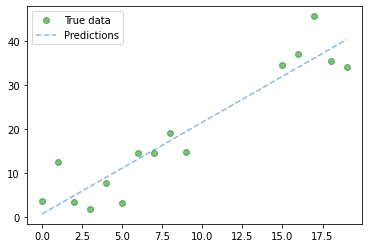

In [22]:
plt.clf()
plt.plot(x_r, y_r, 'go', label='True data', alpha=0.5)
plt.plot(x_r, predicted_r, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()

In [23]:
for name, param in model_retrain.named_parameters():
    if param.requires_grad:
        print (name, param.data)

linear.weight tensor([[2.0835]])
linear.bias tensor([0.7738])


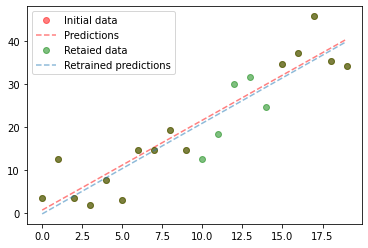

In [26]:
plt.clf()
plt.plot(x_r, y_r, 'go', color='red', label='Initial data', alpha=0.5)
plt.plot(x_r, predicted_r, '--', c='red', label='Predictions', alpha=0.5)
plt.plot(x, y, 'go', label='Retaied data', alpha=0.5)
plt.plot(x, predicted, '--', label='Retrained predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()

In [27]:
# find the reflected point with respect to a line
# for two dimensions we have eqn x_r, y_r = (p(a2−b2)−2b(aq+c)a2+b2,q(b2−a2)−2a(bp+c)a2+b2)
def reflected_coordinates(position, parameters):
    p, q = position
    b, c = parameters
    b =-1*b[0]
    c =-1*c[0]
    a = 1
    x_r = p*(a**2 - b**2) - 2*b*(a*q + c)*a**2 + b**2
    y_r = q*(b**2 - a**2) - 2*a*(b*p + c)*a**2 + b**2
    reflected = ((1 / (a**2 + b**2))*x_r, (1 / (a**2 + b**2))*y_r)
    return reflected

In [28]:
x_d = np.array([x[i] for i in range(10, 15)], dtype=np.float32)
x_d = x_d.reshape(-1, 1)
y_d = np.array([y[i] for i in range(10, 15)], dtype=np.float32)
y_d = y_d.reshape(-1, 1)
y_d

array([[12.535599],
       [18.308867],
       [30.088394],
       [31.557236],
       [24.689701]], dtype=float32)

In [29]:
model_forget = model

[tensor([[2.1015]]), tensor([-0.1103])]

In [30]:
# make reflected coordinates
x_reflected = np.array([], dtype=np.float32)
y_reflected = np.array([], dtype=np.float32)
for i in range(len(x_d)):
    coor = reflected_coordinates((x_d[i], y_d[i]), ([2.0176], [2.0155]))
    x_reflected = np.append(x_reflected, coor[0])
    y_reflected = np.append(y_reflected, coor[1])

x_reflected = x_reflected.reshape(-1, 1)
y_reflected = y_reflected.reshape(-1, 1)

In [31]:
learningRate = 0.005
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model_forget.parameters(), lr=learningRate)

In [32]:

for epoch in range(50):
    # Converting inputs and labels to Variable
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(x_reflected).cuda())
        labels = Variable(torch.from_numpy(y_reflected).cuda())
    else:
        inputs = Variable(torch.from_numpy(x_reflected))
        labels = Variable(torch.from_numpy(y_reflected))

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model_forget(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)
    print(loss)
    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

tensor(44.1917, grad_fn=<MseLossBackward>)
epoch 0, loss 44.191741943359375
tensor(43.8609, grad_fn=<MseLossBackward>)
epoch 1, loss 43.86094284057617
tensor(43.6774, grad_fn=<MseLossBackward>)
epoch 2, loss 43.6773681640625
tensor(43.5165, grad_fn=<MseLossBackward>)
epoch 3, loss 43.51649856567383
tensor(43.3595, grad_fn=<MseLossBackward>)
epoch 4, loss 43.359535217285156
tensor(43.2037, grad_fn=<MseLossBackward>)
epoch 5, loss 43.20365524291992
tensor(43.0484, grad_fn=<MseLossBackward>)
epoch 6, loss 43.04844665527344
tensor(42.8938, grad_fn=<MseLossBackward>)
epoch 7, loss 42.89383316040039
tensor(42.7398, grad_fn=<MseLossBackward>)
epoch 8, loss 42.73978805541992
tensor(42.5863, grad_fn=<MseLossBackward>)
epoch 9, loss 42.586334228515625
tensor(42.4335, grad_fn=<MseLossBackward>)
epoch 10, loss 42.43345260620117
tensor(42.2811, grad_fn=<MseLossBackward>)
epoch 11, loss 42.2811279296875
tensor(42.1294, grad_fn=<MseLossBackward>)
epoch 12, loss 42.12938690185547
tensor(41.9782, grad_

In [33]:
for name, param in model_forget.named_parameters():
    if param.requires_grad:
        print (name, param.data)

linear.weight tensor([[2.0368]])
linear.bias tensor([1.2326])


In [34]:
with torch.no_grad(): # we don't need gradients in the testing phase
    if torch.cuda.is_available():
        predicted_d = model_retrain(Variable(torch.from_numpy(x).cuda())).cpu().data.numpy()
    else:
        predicted_d = model_retrain(Variable(torch.from_numpy(x))).data.numpy()

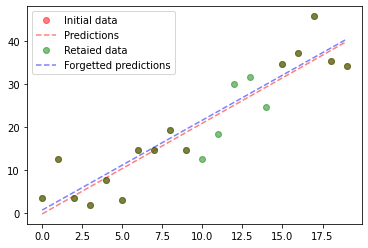

In [40]:
plt.clf()
plt.plot(x_r, y_r, 'go', color='red', label='Initial data', alpha=0.5)
plt.plot(x, predicted, '--', c='red', label='Predictions', alpha=0.5)
plt.plot(x, y, 'go', label='Retaied data', alpha=0.5)
#plt.plot(x_r, predicted_r, '--', label='Retrained predictions', alpha=0.5)
plt.plot(x, predicted_d, '--', c='blue', label='Forgetted predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()

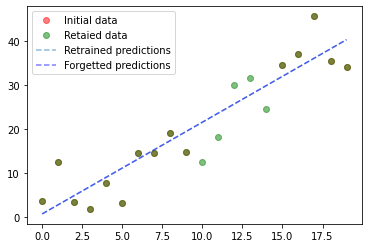

In [41]:
plt.clf()
plt.plot(x_r, y_r, 'go', color='red', label='Initial data', alpha=0.5)
#plt.plot(x, predicted, '--', c='red', label='Predictions', alpha=0.5)
plt.plot(x, y, 'go', label='Retaied data', alpha=0.5)
plt.plot(x_r, predicted_r, '--', label='Retrained predictions', alpha=0.5)
plt.plot(x, predicted_d, '--', c='blue', label='Forgetted predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()